<a href="https://colab.research.google.com/github/SteffySenson/MLHackathon/blob/main/hackathontrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [53]:
train = pd.read_csv("/content/drive/MyDrive/STEFFY/hackathon/train.csv")
test = pd.read_csv("/content/drive/MyDrive/STEFFY/hackathon/test.csv")

In [5]:
train.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,1,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,-1,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,-1,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,-1,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,0,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [6]:
test.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,draw,team1,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,draw,team1,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,loser,team2,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,loser,team1,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,winner,team1,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


In [7]:
test.team[test.team == 'team1'] = 1
test.team[test.team == 'team2'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
train.team[train.team == 'team1'] = 1
train.team[train.team == 'team2'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
test.winner[test.winner == 'winner'] = 1
test.winner[test.winner == 'loser'] = -1
test.winner[test.winner == 'draw'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [10]:
train.winner[train.winner == 'winner'] = 1
train.winner[train.winner == 'loser'] = -1
train.winner[train.winner == 'draw'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [24]:
updated_df = test.dropna(axis=1)

In [22]:
test = test.drop(['row_id','scout_id','winner','team','competitionId','player_general_var_0','player_general_var_1','player_general_var_2','player_general_var_3','player_general_var_5','player_positional_raw_var_0','player_positional_raw_var_1','player_positional_raw_var_2','player_positional_raw_var_3','player_defensive_raw_var_5','player_offensive_raw_var_7','player_other_raw_var_8','player_other_raw_var_9','player_other_raw_var_10','player_offensive_raw_var_11','player_other_raw_var_12','player_other_raw_var_13','player_other_raw_var_14','player_positional_raw_var_15','player_positional_raw_var_16','player_positional_raw_var_17','player_other_raw_var_18','player_other_raw_var_19','player_other_raw_var_20','player_positional_raw_var_21','player_positional_raw_var_22','player_positional_raw_var_23','player_other_raw_var_24','player_other_raw_var_25','player_other_raw_var_26','player_other_raw_var_27','player_other_raw_var_28','player_other_raw_var_29','player_other_raw_var_30','player_offensive_raw_var_32','player_other_raw_var_33','player_other_raw_var_36','player_other_raw_var_37','player_other_raw_var_39','player_other_raw_var_40','player_defensive_raw_var_43','player_offensive_raw_var_46','player_other_raw_var_47','player_defensive_raw_var_48','player_offensive_raw_var_49','player_other_raw_var_51','player_defensive_raw_var_52','player_offensive_raw_var_53','player_other_raw_var_54','player_positional_raw_var_55','player_other_raw_var_57','player_other_raw_var_58','player_offensive_raw_var_60','player_defensive_raw_var_61','player_defensive_raw_var_70','player_general_raw_var_71','player_general_raw_var_72','player_offensive_raw_var_73','player_offensive_raw_var_77','player_offensive_raw_var_79','player_other_raw_var_80','player_other_raw_var_81','player_other_raw_var_82','player_other_raw_var_83','player_other_raw_var_84','player_other_raw_var_85','player_positional_raw_var_86','player_offensive_raw_var_87','player_other_raw_var_88','player_other_raw_var_90','player_other_raw_var_91','player_defensive_raw_var_95','player_other_raw_var_96','player_defensive_raw_var_97','player_other_raw_var_98','player_other_raw_var_99','player_defensive_raw_var_100','player_other_raw_var_101','player_offensive_raw_var_102','player_general_raw_var_114','player_other_raw_var_135','player_offensive_raw_var_138','player_other_raw_var_139','player_general_raw_var_143','player_other_raw_var_144','player_offensive_raw_var_145','player_other_raw_var_146','player_other_raw_var_147','player_offensive_raw_var_148','player_other_raw_var_149','player_offensive_raw_var_150','player_offensive_raw_var_151','player_other_raw_var_152','player_offensive_raw_var_153','player_other_raw_var_154','player_offensive_raw_var_155','player_offensive_raw_var_156','player_other_raw_var_157','player_offensive_raw_var_158','player_other_raw_var_159','player_other_raw_var_160','player_defensive_raw_var_161','player_general_raw_var_162','player_other_raw_var_163','player_other_raw_var_164','player_defensive_raw_var_165','player_other_raw_var_167','player_other_raw_var_168','player_other_raw_var_169','player_offensive_raw_var_170','player_other_raw_var_171','player_other_raw_var_172','player_other_raw_var_173','player_positional_raw_var_174','player_other_raw_var_175','player_other_raw_var_176','player_other_raw_var_177','player_other_raw_var_178','player_other_raw_var_179','player_other_raw_var_180','player_offensive_raw_var_182','player_other_raw_var_188','player_positional_ratio_var_0','player_positional_ratio_var_1','player_defensive_ratio_var_2','player_defensive_ratio_var_3','player_other_ratio_var_4','player_other_ratio_var_5','player_other_ratio_var_7','player_other_ratio_var_10','player_offensive_ratio_var_13','player_other_ratio_var_14','player_defensive_ratio_var_16','player_offensive_ratio_var_21','player_positional_ratio_var_22','player_other_ratio_var_23','player_other_ratio_var_24','player_other_ratio_var_25','player_other_ratio_var_26','player_other_ratio_var_27','player_other_ratio_var_28','player_other_ratio_var_30','player_other_ratio_var_31','player_other_ratio_var_32','player_other_ratio_var_33','player_other_ratio_var_34','player_offensive_ratio_var_35','player_other_ratio_var_36','player_other_ratio_var_37','player_defensive_ratio_var_38','player_defensive_ratio_var_39','player_offensive_ratio_var_40','player_offensive_ratio_var_57','player_other_ratio_var_65','player_other_ratio_var_66','player_other_ratio_var_67','player_offensive_ratio_var_68','player_offensive_ratio_var_69','player_offensive_ratio_var_70','player_other_ratio_var_71','player_offensive_ratio_var_72','player_other_ratio_var_73','player_other_ratio_var_74','player_other_ratio_var_75','player_offensive_ratio_var_77','player_offensive_ratio_var_78','player_positional_ratio_var_79','player_other_ratio_var_80','player_defensive_ratio_var_82','player_defensive_ratio_var_83','player_defensive_derived_var_12','player_positional_derived_var_14','player_positional_derived_var_15','player_positional_derived_var_22','player_positional_derived_var_43','player_positional_derived_var_44','player_offensive_derived_var_46','player_offensive_derived_var_47','player_offensive_derived_var_50','player_positional_derived_var_53','player_offensive_derived_var_60','player_other_derived_var_61','player_offensive_derived_var_63','player_defensive_derived_var_67','player_positional_derived_var_77','player_positional_derived_var_78','player_offensive_derived_var_80','player_offensive_derived_var_81','player_positional_derived_var_87','player_other_derived_var_96','player_offensive_derived_var_99','player_defensive_derived_var_103','player_defensive_derived_var_114','player_positional_derived_var_116','player_positional_derived_var_117','player_offensive_derived_var_119','player_offensive_derived_var_120','player_positional_derived_var_125','player_offensive_derived_var_135','player_defensive_derived_var_137','player_defensive_derived_var_138','player_general_derived_var_148','player_general_derived_var_152','player_offensive_derived_var_158','player_offensive_derived_var_159','player_offensive_derived_var_161','team1_defensive_raw_var_3','team1_offensive_raw_var_4','team1_defensive_raw_var_6','team1_defensive_raw_var_9','team1_offensive_raw_var_10','team1_defensive_raw_var_12','team1_offensive_raw_var_13','team1_other_raw_var_14','team1_other_raw_var_19','team1_other_raw_var_30','team1_other_raw_var_31','team1_other_raw_var_33','team1_other_raw_var_33','team1_other_raw_var_38','team1_other_raw_var_40','team1_other_raw_var_43','team1_other_raw_var_50','team1_other_raw_var_51','team1_other_raw_var_53','team1_other_raw_var_72','team1_other_raw_var_79','team1_other_raw_var_82','team1_other_raw_var_92','team1_other_ratio_var_32','team1_other_ratio_var_33','team1_defensive_derived_var_3','team1_offensive_derived_var_4','team1_offensive_derived_var_7','team1_defensive_derived_var_9','team1_defensive_derived_var_10','team1_offensive_derived_var_12','team1_offensive_derived_var_13','team1_offensive_derived_var_14','team1_offensive_derived_var_19','team2_other_raw_var_31','team2_other_raw_var_33','team2_other_raw_var_38','team2_other_raw_var_40','team2_other_raw_var_43','team2_other_raw_var_50','team2_other_raw_var_51','team2_other_raw_var_53','team2_other_raw_var_72','team2_other_raw_var_79','team2_other_raw_var_82','team2_other_raw_var_92','team2_other_ratio_var_32','team2_other_ratio_var_33'],axis=1)


In [28]:
train = train.drop(['rating_num'],axis=1)

In [30]:
test = test.drop(['player_position_1','player_position_2','player_height','player_weight'],axis=1)

In [31]:
test.head()

,player_general_var_4,player_defensive_raw_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,0.114754,0.0625,0.467550,0.0,0.090909,0.1,0.000000,0.333333,0.272727,0.3750,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,0.229508,0.0625,0.287744,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.0625,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,0.049180,0.0000,0.467550,0.0,0.000000,0.0,0.000000,0.111111,0.090909,0.1250,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,0.073770,0.0000,0.467550,0.0,0.000000,0.0,0.058824,0.000000,0.000000,0.0000,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,0.106557,0.0000,0.359680,0.0,0.090909,0.1,0.000000,0.000000,0.090909,0.0625,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


In [29]:
train.head()

,player_general_var_4,player_defensive_raw_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,0.114754,0.0000,0.467550,0.142857,0.090909,0.0,0.294118,0.000000,0.000000,0.0625,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,0.081967,0.0625,0.436467,0.000000,0.090909,0.1,0.000000,0.000000,0.090909,0.0625,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,0.065574,0.1875,0.631370,0.071429,0.090909,0.0,0.117647,0.111111,0.090909,0.1250,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,0.000000,0.0000,0.467550,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,0.262295,0.0000,0.467550,0.000000,0.090909,0.1,0.000000,0.111111,0.181818,0.3125,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [ ]:
test.isnull().sum()

In [ ]:
train.isnull().sum()

In [34]:
pd.set_option('display.max_rows', None)

In [15]:
train['team2_defensive_derived_var_15'] = train['team2_defensive_derived_var_15'].fillna(train['team2_defensive_derived_var_15'].mean())
train['team2_offensive_derived_var_16'] = train['team2_offensive_derived_var_16'].fillna(train['team2_offensive_derived_var_16'].mean())
train['team2_defensive_derived_var_17'] = train['team2_defensive_derived_var_17'].fillna(train['team2_defensive_derived_var_17'].mean())
train['team2_offensive_derived_var_18'] = train['team2_offensive_derived_var_18'].fillna(train['team2_offensive_derived_var_18'].mean())
train['team2_offensive_derived_var_19'] = train['team2_offensive_derived_var_19'].fillna(train['team2_offensive_derived_var_19'].mean())

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [21]:
train = train.drop(['row_id','scout_id','winner','team','competitionId','player_position_1','player_position_2','player_height','player_weight','player_general_var_0','player_general_var_1','player_general_var_2','player_general_var_3','player_general_var_5','player_positional_raw_var_0','player_positional_raw_var_1','player_positional_raw_var_2','player_positional_raw_var_3','player_defensive_raw_var_5','player_offensive_raw_var_7','player_other_raw_var_8','player_other_raw_var_9','player_other_raw_var_10','player_offensive_raw_var_11','player_other_raw_var_12','player_other_raw_var_13','player_other_raw_var_14','player_positional_raw_var_15','player_positional_raw_var_16','player_positional_raw_var_17','player_other_raw_var_18','player_other_raw_var_19','player_other_raw_var_20','player_positional_raw_var_21','player_positional_raw_var_22','player_positional_raw_var_23','player_other_raw_var_24','player_other_raw_var_25','player_other_raw_var_26','player_other_raw_var_27','player_other_raw_var_28','player_other_raw_var_29','player_other_raw_var_30','player_offensive_raw_var_32','player_other_raw_var_33','player_other_raw_var_36','player_other_raw_var_37','player_other_raw_var_39','player_other_raw_var_40','player_defensive_raw_var_43','player_offensive_raw_var_46','player_other_raw_var_47','player_defensive_raw_var_48','player_offensive_raw_var_49','player_other_raw_var_51','player_defensive_raw_var_52','player_offensive_raw_var_53','player_other_raw_var_54','player_positional_raw_var_55','player_other_raw_var_57','player_other_raw_var_58','player_offensive_raw_var_60','player_defensive_raw_var_61','player_defensive_raw_var_70','player_general_raw_var_71','player_general_raw_var_72','player_offensive_raw_var_73','player_offensive_raw_var_77','player_offensive_raw_var_79','player_other_raw_var_80','player_other_raw_var_81','player_other_raw_var_82','player_other_raw_var_83','player_other_raw_var_84','player_other_raw_var_85','player_positional_raw_var_86','player_offensive_raw_var_87','player_other_raw_var_88','player_other_raw_var_90','player_other_raw_var_91','player_defensive_raw_var_95','player_other_raw_var_96','player_defensive_raw_var_97','player_other_raw_var_98','player_other_raw_var_99','player_defensive_raw_var_100','player_other_raw_var_101','player_offensive_raw_var_102','player_general_raw_var_114','player_other_raw_var_135','player_offensive_raw_var_138','player_other_raw_var_139','player_general_raw_var_143','player_other_raw_var_144','player_offensive_raw_var_145','player_other_raw_var_146','player_other_raw_var_147','player_offensive_raw_var_148','player_other_raw_var_149','player_offensive_raw_var_150','player_offensive_raw_var_151','player_other_raw_var_152','player_offensive_raw_var_153','player_other_raw_var_154','player_offensive_raw_var_155','player_offensive_raw_var_156','player_other_raw_var_157','player_offensive_raw_var_158','player_other_raw_var_159','player_other_raw_var_160','player_defensive_raw_var_161','player_general_raw_var_162','player_other_raw_var_163','player_other_raw_var_164','player_defensive_raw_var_165','player_other_raw_var_167','player_other_raw_var_168','player_other_raw_var_169','player_offensive_raw_var_170','player_other_raw_var_171','player_other_raw_var_172','player_other_raw_var_173','player_positional_raw_var_174','player_other_raw_var_175','player_other_raw_var_176','player_other_raw_var_177','player_other_raw_var_178','player_other_raw_var_179','player_other_raw_var_180','player_offensive_raw_var_182','player_other_raw_var_188','player_positional_ratio_var_0','player_positional_ratio_var_1','player_defensive_ratio_var_2','player_defensive_ratio_var_3','player_other_ratio_var_4','player_other_ratio_var_5','player_other_ratio_var_7','player_other_ratio_var_10','player_offensive_ratio_var_13','player_other_ratio_var_14','player_defensive_ratio_var_16','player_offensive_ratio_var_21','player_positional_ratio_var_22','player_other_ratio_var_23','player_other_ratio_var_24','player_other_ratio_var_25','player_other_ratio_var_26','player_other_ratio_var_27','player_other_ratio_var_28','player_other_ratio_var_30','player_other_ratio_var_31','player_other_ratio_var_32','player_other_ratio_var_33','player_other_ratio_var_34','player_offensive_ratio_var_35','player_other_ratio_var_36','player_other_ratio_var_37','player_defensive_ratio_var_38','player_defensive_ratio_var_39','player_offensive_ratio_var_40','player_offensive_ratio_var_57','player_other_ratio_var_65','player_other_ratio_var_66','player_other_ratio_var_67','player_offensive_ratio_var_68','player_offensive_ratio_var_69','player_offensive_ratio_var_70','player_other_ratio_var_71','player_offensive_ratio_var_72','player_other_ratio_var_73','player_other_ratio_var_74','player_other_ratio_var_75','player_offensive_ratio_var_77','player_offensive_ratio_var_78','player_positional_ratio_var_79','player_other_ratio_var_80','player_defensive_ratio_var_82','player_defensive_ratio_var_83','player_defensive_derived_var_12','player_positional_derived_var_14','player_positional_derived_var_15','player_positional_derived_var_22','player_positional_derived_var_43','player_positional_derived_var_44','player_offensive_derived_var_46','player_offensive_derived_var_47','player_offensive_derived_var_50','player_positional_derived_var_53','player_offensive_derived_var_60','player_other_derived_var_61','player_offensive_derived_var_63','player_defensive_derived_var_67','player_positional_derived_var_77','player_positional_derived_var_78','player_offensive_derived_var_80','player_offensive_derived_var_81','player_positional_derived_var_87','player_other_derived_var_96','player_offensive_derived_var_99','player_defensive_derived_var_103','player_defensive_derived_var_114','player_positional_derived_var_116','player_positional_derived_var_117','player_offensive_derived_var_119','player_offensive_derived_var_120','player_positional_derived_var_125','player_offensive_derived_var_135','player_defensive_derived_var_137','player_defensive_derived_var_138','player_general_derived_var_148','player_general_derived_var_152','player_offensive_derived_var_158','player_offensive_derived_var_159','player_offensive_derived_var_161','team1_defensive_raw_var_3','team1_offensive_raw_var_4','team1_defensive_raw_var_6','team1_defensive_raw_var_9','team1_offensive_raw_var_10','team1_defensive_raw_var_12','team1_offensive_raw_var_13','team1_other_raw_var_14','team1_other_raw_var_19','team1_other_raw_var_30','team1_other_raw_var_31','team1_other_raw_var_33','team1_other_raw_var_33','team1_other_raw_var_38','team1_other_raw_var_40','team1_other_raw_var_43','team1_other_raw_var_50','team1_other_raw_var_51','team1_other_raw_var_53','team1_other_raw_var_72','team1_other_raw_var_79','team1_other_raw_var_82','team1_other_raw_var_92','team1_other_ratio_var_32','team1_other_ratio_var_33','team1_defensive_derived_var_3','team1_offensive_derived_var_4','team1_offensive_derived_var_7','team1_defensive_derived_var_9','team1_defensive_derived_var_10','team1_offensive_derived_var_12','team1_offensive_derived_var_13','team1_offensive_derived_var_14','team1_offensive_derived_var_19','team2_other_raw_var_31','team2_other_raw_var_33','team2_other_raw_var_38','team2_other_raw_var_40','team2_other_raw_var_43','team2_other_raw_var_50','team2_other_raw_var_51','team2_other_raw_var_53','team2_other_raw_var_72','team2_other_raw_var_79','team2_other_raw_var_82','team2_other_raw_var_92','team2_other_ratio_var_32','team2_other_ratio_var_33'],axis=1)

In [49]:
updated_df = train

In [36]:
train = train.fillna(train.mean())

In [37]:
test= test.fillna(test.mean())

train.info

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 537 entries, player_general_var_4 to team2_offensive_derived_var_19
dtypes: float64(537)
memory usage: 83.8 MB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8774 entries, 0 to 8773
Columns: 537 entries, player_general_var_4 to team2_offensive_derived_var_19
dtypes: float64(537)
memory usage: 35.9 MB


In [51]:
y1 = updated_df['rating_num']
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

ValueError: ignored

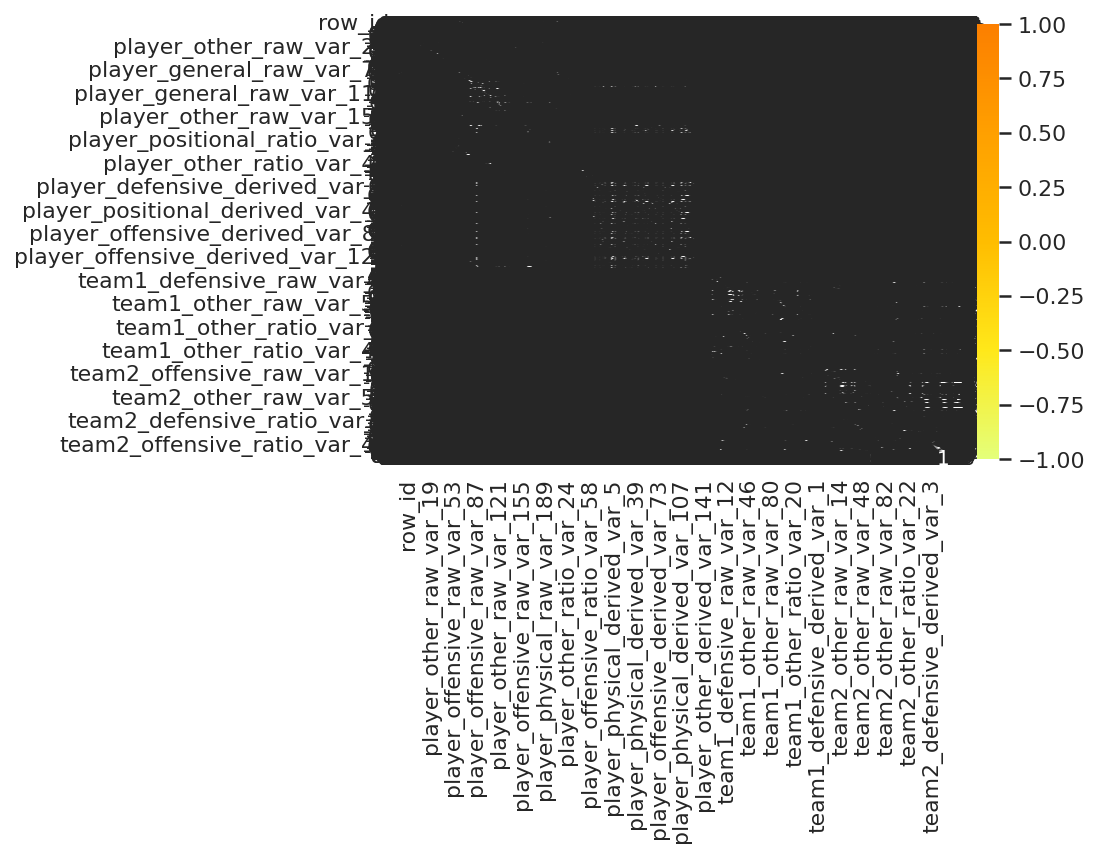

In [ ]:
corr = train.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);